## Imports

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


---

In [1]:
import os
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
fp_local = '/home/jovyan/docker/src/python/temp_test/DJGrad'
fp_data = os.path.join(fp_local, 'data')

In [3]:
y = []
x = []

for directory in os.listdir(fp_data):
    for label in os.listdir(os.path.join(fp_data, directory)):
        files = os.listdir(os.path.join(fp_data, directory,label))
        for file in tqdm(files,total=len(files)):
            if '.jpg' not in file: continue
            y.append(label)
            x.append(np.asarray(Image.open(os.path.join(fp_data, directory,label,file))))

le = LabelEncoder()

y = np.array(le.fit_transform(y))
x = np.array(x)

In [4]:
x.shape, y.shape

((1295, 500, 500, 3), (1295,))

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True)

In [6]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = 3

In [7]:
batch_size=1
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(100).batch(batch_size,True)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).shuffle(100).batch(batch_size,True)

In [9]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(*x.shape[1:],)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
#     layers.Conv2D(128, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(256, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.9),
#     layers.Dense(1024, activation='relu'),
    layers.Dense(128, activation='relu'),
#     layers.Dense(16, activation='relu'),
    layers.Dense(num_classes, 'softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
epochs=100
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)

Epoch 1/100
15/15 [==============================] - 4s 120ms/step - loss: 7.6016 - accuracy: 0.3531 - val_loss: 1.1052 - val_accuracy: 0.3313
Epoch 2/100
15/15 [==============================] - 2s 118ms/step - loss: 1.0911 - accuracy: 0.3260 - val_loss: 1.0891 - val_accuracy: 0.3375
Epoch 3/100
15/15 [==============================] - 2s 112ms/step - loss: 1.0721 - accuracy: 0.3615 - val_loss: 1.0674 - val_accuracy: 0.3375
Epoch 4/100
15/15 [==============================] - 2s 115ms/step - loss: 1.0148 - accuracy: 0.4479 - val_loss: 0.9937 - val_accuracy: 0.3938
Epoch 5/100
15/15 [==============================] - 2s 113ms/step - loss: 0.9462 - accuracy: 0.5094 - val_loss: 0.9895 - val_accuracy: 0.4437
Epoch 6/100
15/15 [==============================] - 2s 115ms/step - loss: 0.9072 - accuracy: 0.5583 - val_loss: 0.8958 - val_accuracy: 0.5469
Epoch 7/100
15/15 [==============================] - 2s 122ms/step - loss: 0.8731 - accuracy: 0.5771 - val_loss: 0.9599 - val_accuracy: 0.4969

Epoch 58/100
15/15 [==============================] - 2s 116ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 1.2084 - val_accuracy: 0.7719
Epoch 59/100
15/15 [==============================] - 2s 116ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 1.0933 - val_accuracy: 0.7625
Epoch 60/100
15/15 [==============================] - 2s 119ms/step - loss: 0.0103 - accuracy: 0.9979 - val_loss: 1.4325 - val_accuracy: 0.7437
Epoch 61/100
15/15 [==============================] - 2s 118ms/step - loss: 0.0140 - accuracy: 0.9979 - val_loss: 1.1522 - val_accuracy: 0.7812
Epoch 62/100
15/15 [==============================] - 2s 116ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.1260 - val_accuracy: 0.7875
Epoch 63/100
15/15 [==============================] - 2s 118ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 1.5717 - val_accuracy: 0.7563
Epoch 64/100
15/15 [==============================] - 2s 118ms/step - loss: 0.0115 - accuracy: 0.9958 - val_loss: 1.2079 - val_accuracy:

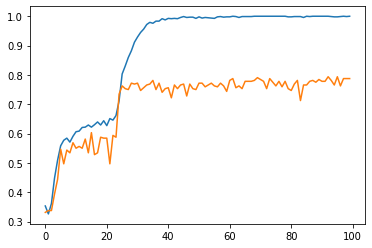

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

---

## Custom model

In [8]:
from tensorflow import keras
from copy import deepcopy

class DistMLP(keras.Model):
    def __init__(self,):
        super(DistMLP, self).__init__()
        self.mod1 = Sequential([
            layers.Rescaling(1./255, input_shape=(*x.shape[1:],)),
            layers.Conv2D(16, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding='same', activation='relu'),
            layers.MaxPooling2D(),
            layers.Flatten(),
#             layers.Dropout(0.9),
            layers.Dense(128, activation='relu'),
            layers.Dense(num_classes, 'softmax')
        ])
        
        self.mod2 = tf.keras.models.clone_model(self.mod1)
        self.mod3 = tf.keras.models.clone_model(self.mod1)
#         self.mod4 = tf.keras.models.clone_model(self.mod1)

    def call(self, data):
        return self.mod1(data)

    def train_step(self, data):
        x,y = data
        with tf.GradientTape() as tape:
            y_pred1 = self.mod1(x,training=True)
            y_pred2 = self.mod2(x,training=True)
            y_pred3 = self.mod3(x,training=True)
#             y_pred4 = self.mod4(x,training=True)
            loss1 = self.compiled_loss(y,y_pred1)
            loss2 = self.compiled_loss(y,y_pred2)
            loss3 = self.compiled_loss(y,y_pred3)
#             loss4 = self.compiled_loss(y,y_pred4)

        grads = tape.gradient([loss1,loss2,loss3], self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.compiled_metrics.update_state(tf.concat([y,y,y],0), tf.concat([y_pred1,y_pred2,y_pred3],0))

        return {m.name: m.result() for m in self.metrics}

In [9]:
m = DistMLP()
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
    run_eagerly=True
)

In [10]:
m.fit(
    train_dataset,
    epochs=10
)

Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor with shape[1000000,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Fill]

---

## Try smaller Dataset

In [243]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [194]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [207]:
x_test.reshape(-1,28**2).shape

(10000, 784)

In [238]:
batch_size = 128

train_dataset = tf.data.Dataset.from_tensor_slices((x_train.reshape(60000,28**2),y_train)).shuffle(100).batch(batch_size,True)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test.reshape(10000,28**2),y_test)).shuffle(100).batch(batch_size,True)

In [245]:
model = Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28**2,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, 'softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
    ),
    metrics=['accuracy']
)

In [246]:
epochs=30
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset
)

Epoch 1/30
468/468 [==============================] - 1s 1ms/step - loss: 2.0160 - accuracy: 0.6416 - val_loss: 0.7792 - val_accuracy: 0.7812
Epoch 2/30
468/468 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.8381 - val_loss: 0.4346 - val_accuracy: 0.9054
Epoch 3/30
468/468 [==============================] - 0s 971us/step - loss: 0.3225 - accuracy: 0.9201 - val_loss: 0.3341 - val_accuracy: 0.9385
Epoch 4/30
468/468 [==============================] - 0s 978us/step - loss: 0.2370 - accuracy: 0.9410 - val_loss: 0.2551 - val_accuracy: 0.9501
Epoch 5/30
468/468 [==============================] - 0s 978us/step - loss: 0.1889 - accuracy: 0.9525 - val_loss: 0.2630 - val_accuracy: 0.9453
Epoch 6/30
468/468 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9616 - val_loss: 0.2404 - val_accuracy: 0.9574
Epoch 7/30
468/468 [==============================] - 0s 974us/step - loss: 0.1330 - accuracy: 0.9650 - val_loss: 0.1630 - val_accuracy: 0.962

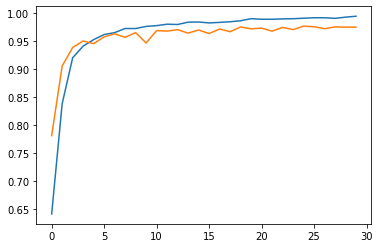

In [248]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

---

## Custom model

In [346]:
from sklearn.utils import shuffle

split_by_type = [x_train[np.where(y_train==x)] for x in range(10)]
split_by_type = [x[:x.shape[0]//4*4].reshape(4,-1,28,28) for x in split_by_type]

ds1  = [split_by_type[0][0:2], split_by_type[1][0:2]]
ds2  = [split_by_type[2][0:2], split_by_type[3][0:2]]
ds3  = [split_by_type[4][0:2], split_by_type[5][0:2]]
ds4  = [split_by_type[6][0:2], split_by_type[7][0:2]]

y1   = [0 for _ in range(np.multiply(*split_by_type[0][0:2].shape[:2]))] + [1 for _ in range(np.multiply(*split_by_type[1][0:2].shape[:2]))]
y2   = [2 for _ in range(np.multiply(*split_by_type[2][0:2].shape[:2]))] + [3 for _ in range(np.multiply(*split_by_type[3][0:2].shape[:2]))]
y3   = [4 for _ in range(np.multiply(*split_by_type[4][0:2].shape[:2]))] + [5 for _ in range(np.multiply(*split_by_type[5][0:2].shape[:2]))]
y4   = [6 for _ in range(np.multiply(*split_by_type[6][0:2].shape[:2]))] + [7 for _ in range(np.multiply(*split_by_type[7][0:2].shape[:2]))]

##

ds1 += [split_by_type[2][2:3], split_by_type[3][2:3]]
ds2 += [split_by_type[4][2:3], split_by_type[5][2:3]]
ds3 += [split_by_type[6][2:3], split_by_type[7][2:3]]
ds4 += [split_by_type[0][2:3], split_by_type[1][2:3]]

y1  += [2 for _ in range(np.multiply(*split_by_type[2][2:3].shape[:2]))] + [3 for _ in range(np.multiply(*split_by_type[3][2:3].shape[:2]))]
y2  += [4 for _ in range(np.multiply(*split_by_type[4][2:3].shape[:2]))] + [5 for _ in range(np.multiply(*split_by_type[5][2:3].shape[:2]))]
y3  += [6 for _ in range(np.multiply(*split_by_type[6][2:3].shape[:2]))] + [7 for _ in range(np.multiply(*split_by_type[7][2:3].shape[:2]))]
y4  += [0 for _ in range(np.multiply(*split_by_type[0][2:3].shape[:2]))] + [1 for _ in range(np.multiply(*split_by_type[1][2:3].shape[:2]))]

##

ds1 += [split_by_type[4][3:4], split_by_type[5][3:4]]
ds2 += [split_by_type[6][3:4], split_by_type[7][3:4]]
ds3 += [split_by_type[0][3:4], split_by_type[1][3:4]]
ds4 += [split_by_type[2][3:4], split_by_type[3][3:4]]

y1  += [4 for _ in range(np.multiply(*split_by_type[4][3:4].shape[:2]))] + [5 for _ in range(np.multiply(*split_by_type[5][3:4].shape[:2]))]
y2  += [6 for _ in range(np.multiply(*split_by_type[6][3:4].shape[:2]))] + [7 for _ in range(np.multiply(*split_by_type[7][3:4].shape[:2]))]
y3  += [0 for _ in range(np.multiply(*split_by_type[0][3:4].shape[:2]))] + [1 for _ in range(np.multiply(*split_by_type[1][3:4].shape[:2]))]
y4  += [2 for _ in range(np.multiply(*split_by_type[2][3:4].shape[:2]))] + [3 for _ in range(np.multiply(*split_by_type[3][3:4].shape[:2]))]

##

ds1 += [split_by_type[8][0:1], split_by_type[9][0:1]]
ds2 += [split_by_type[8][1:2], split_by_type[9][1:2]]
ds3 += [split_by_type[8][2:3], split_by_type[9][2:3]]
ds4 += [split_by_type[8][3:4], split_by_type[9][3:4]]

y1  += [8 for _ in range(np.multiply(*split_by_type[8][0:1].shape[:2]))] + [9 for _ in range(np.multiply(*split_by_type[9][0:1].shape[:2]))]
y2  += [8 for _ in range(np.multiply(*split_by_type[8][1:2].shape[:2]))] + [9 for _ in range(np.multiply(*split_by_type[9][1:2].shape[:2]))]
y3  += [8 for _ in range(np.multiply(*split_by_type[8][2:3].shape[:2]))] + [9 for _ in range(np.multiply(*split_by_type[9][2:3].shape[:2]))]
y4  += [8 for _ in range(np.multiply(*split_by_type[8][3:4].shape[:2]))] + [9 for _ in range(np.multiply(*split_by_type[9][3:4].shape[:2]))]

##

ds1 = [list(x.reshape(-1,28,28)) for x in ds1]
ds2 = [list(x.reshape(-1,28,28)) for x in ds2]
ds3 = [list(x.reshape(-1,28,28)) for x in ds3]
ds4 = [list(x.reshape(-1,28,28)) for x in ds4]

##

ds1 = np.array([item for sublist in ds1 for item in sublist])
ds2 = np.array([item for sublist in ds2 for item in sublist])
ds3 = np.array([item for sublist in ds3 for item in sublist])
ds4 = np.array([item for sublist in ds4 for item in sublist])

y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)

##

ds1,y1 = shuffle(ds1,y1)
ds2,y2 = shuffle(ds2,y2)
ds3,y3 = shuffle(ds3,y3)
ds4,y4 = shuffle(ds4,y4)

##

m = min([x.shape[0] for x in [ds1,ds2,ds3,ds4]])

ds1,y1 = ds1[:m].reshape(-1,28**2),y1[:m]
ds2,y2 = ds2[:m].reshape(-1,28**2),y2[:m]
ds3,y3 = ds3[:m].reshape(-1,28**2),y3[:m]
ds4,y4 = ds4[:m].reshape(-1,28**2),y4[:m]

##

x_test = x_test.reshape(-1,28**2)
train_dataset = tf.data.Dataset.from_tensor_slices((ds1,y1,ds2,y2,ds3,y3,ds4,y4)).shuffle(100).batch(batch_size,True)
validation_dataset= tf.data.Dataset.from_tensor_slices((x_test,y_test,x_test,y_test,x_test,y_test,x_test,y_test)).shuffle(100).batch(batch_size,True)

In [452]:
from tensorflow import keras
from copy import deepcopy
import tensorflow.experimental.numpy as tnp

class DistMLP(keras.Model):
    def __init__(self,mode='none'):
        super(DistMLP, self).__init__()
        self.mod1 = Sequential([
            layers.Dense(1024, activation='relu', input_shape=(28**2,)),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(10, 'softmax')
        ])
        
        self.mod2 = tf.keras.models.clone_model(self.mod1)
        self.mod3 = tf.keras.models.clone_model(self.mod1)
        self.mod4 = tf.keras.models.clone_model(self.mod1)
        
        self.mode=mode

    def call(self, data):
        return self.mod1(data)

    def train_step(self, data):
        x1,y1,x2,y2,x3,y3,x4,y4, = data
        with tf.GradientTape() as tape:
            y_pred1 = self.mod1(x1,training=True)
            y_pred2 = self.mod2(x2,training=True)
            y_pred3 = self.mod3(x3,training=True)
            y_pred4 = self.mod4(x4,training=True)
            loss1 = self.compiled_loss(y1,y_pred1)
            loss2 = self.compiled_loss(y2,y_pred2)
            loss3 = self.compiled_loss(y3,y_pred3)
            loss4 = self.compiled_loss(y4,y_pred4)

        grads = tape.gradient([loss1,loss2,loss3,loss4], self.trainable_weights)
        
        if self.mode=='none':
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        elif self.mode=='simple_add':
            temp = [tf.math.add_n([grads[n+i*(len(grads)//4)] for i in range(4)]) for n in range(len(grads)//4)]
            self.optimizer.apply_gradients(zip([*temp,*temp,*temp,*temp], self.trainable_weights))
        elif self.mode=='djgrad':
            # Fill in here
        
        # Need a metric that gives accuracy for each model individually
        self.compiled_metrics.update_state(tf.concat([y1,y2,y3,y4],0), tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0))

        return {m.name: m.result() for m in self.metrics}

In [453]:
m = DistMLP('simple_add')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
    run_eagerly=True
)

In [454]:
history = m.fit(
    train_dataset,
    epochs=100,
    validation_data=test_dataset
)

Epoch 1/100
115/115 [==============================] - 3s 24ms/step - loss: 3.6634 - accuracy: 0.1807 - val_loss: 2.1008 - val_accuracy: 0.1935
Epoch 2/100
115/115 [==============================] - 3s 23ms/step - loss: 1.9643 - accuracy: 0.2620 - val_loss: 1.9589 - val_accuracy: 0.2939
Epoch 3/100
115/115 [==============================] - 3s 24ms/step - loss: 1.8996 - accuracy: 0.2868 - val_loss: 1.9635 - val_accuracy: 0.2996
Epoch 4/100
115/115 [==============================] - 3s 24ms/step - loss: 1.8525 - accuracy: 0.2912 - val_loss: 1.9242 - val_accuracy: 0.3006
Epoch 5/100
115/115 [==============================] - 3s 23ms/step - loss: 1.8385 - accuracy: 0.2856 - val_loss: 2.5706 - val_accuracy: 0.3016
Epoch 6/100
115/115 [==============================] - 3s 23ms/step - loss: 1.8515 - accuracy: 0.2739 - val_loss: 2.0026 - val_accuracy: 0.3229
Epoch 7/100
115/115 [==============================] - 3s 23ms/step - loss: 1.8171 - accuracy: 0.2906 - val_loss: 2.0664 - val_accuracy:

115/115 [==============================] - 3s 23ms/step - loss: 0.6207 - accuracy: 0.7897 - val_loss: 3.8884 - val_accuracy: 0.7617
Epoch 58/100
115/115 [==============================] - 3s 23ms/step - loss: 0.6099 - accuracy: 0.7944 - val_loss: 3.8079 - val_accuracy: 0.7634
Epoch 59/100
115/115 [==============================] - 3s 23ms/step - loss: 0.6010 - accuracy: 0.7963 - val_loss: 3.3483 - val_accuracy: 0.7588
Epoch 60/100
115/115 [==============================] - 3s 23ms/step - loss: 0.6154 - accuracy: 0.7977 - val_loss: 3.9126 - val_accuracy: 0.7415
Epoch 61/100
115/115 [==============================] - 3s 23ms/step - loss: 0.6000 - accuracy: 0.8008 - val_loss: 3.8601 - val_accuracy: 0.7548
Epoch 62/100
115/115 [==============================] - 3s 23ms/step - loss: 0.5966 - accuracy: 0.8055 - val_loss: 4.9005 - val_accuracy: 0.7640
Epoch 63/100
115/115 [==============================] - 3s 23ms/step - loss: 0.6003 - accuracy: 0.7993 - val_loss: 2.8369 - val_accuracy: 0.749

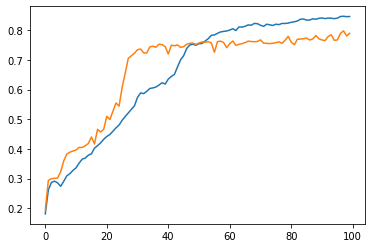

In [455]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()